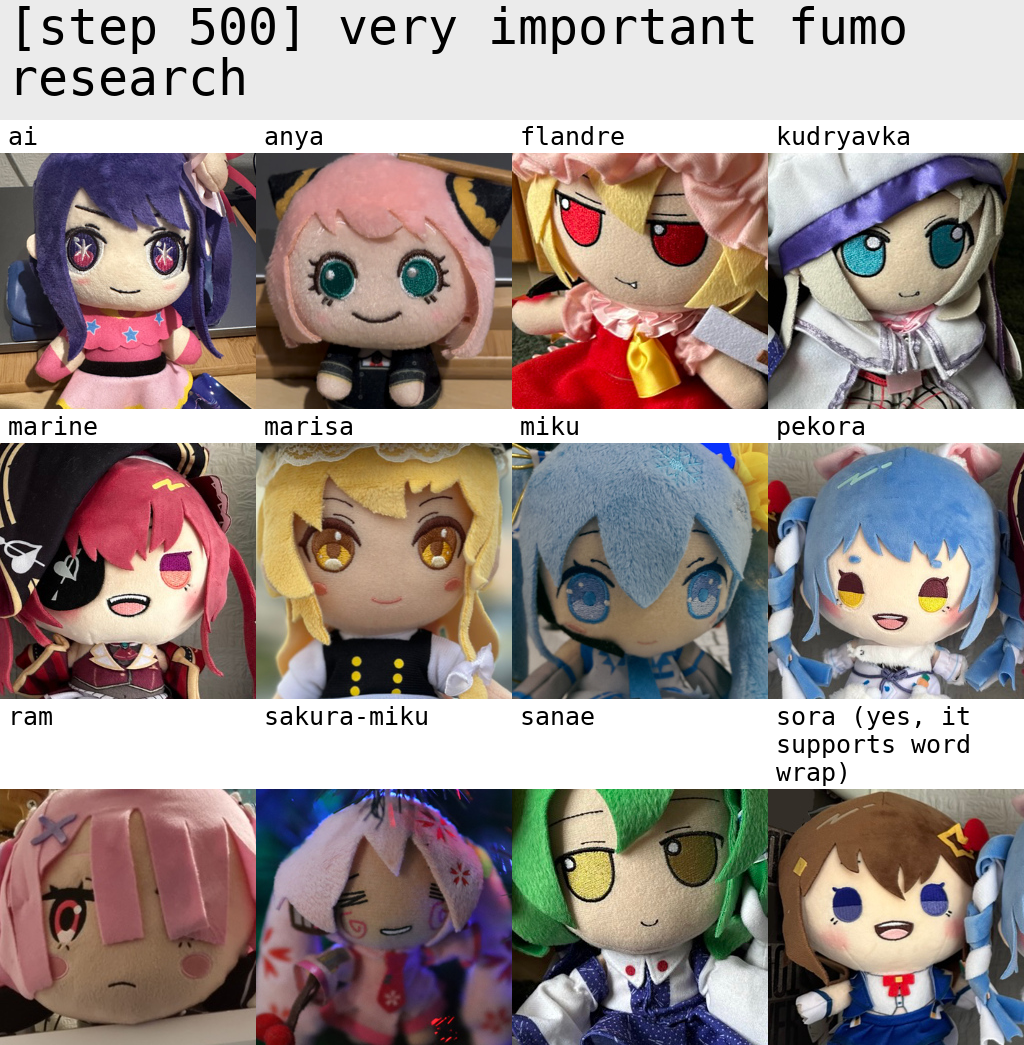

In [11]:
from PIL import Image, ImageFont
from typing import List

from importlib import reload
import grid_printer.make_captioned_grid as mcg
# reload ensures that if we modify the make_captioned_grid source code: our changes will be reflected when we next run the cell (no need to restart the Jupyter kernel)
reload(mcg)

# on systems such as RHEL, you might find your fonts are installed inside /usr/share/fonts
# we ship a copy of DejaVu Sans for your convenience
deja_vu_sans_path = "font/DejaVuSansMono.ttf"
cell_font = ImageFont.truetype(deja_vu_sans_path, 25)
title_font = ImageFont.truetype(deja_vu_sans_path, 50)
# if you don't have a font handy, you can use:
# ImageFont.load_default()

pad = 8
cell_pad = mcg.BBox(top=pad, left=pad, bottom=pad, right=pad)
# abusing bottom padding to simulate a margin-bottom
title_pad = mcg.BBox(top=pad, left=pad, bottom=pad*3, right=pad)

cols=4

file_stems: List[str] = [
  'ai',
  'anya',
  'flandre',
  'kudryavka',
  'marine',
  'marisa',
  'miku',
  'pekora',
  'ram',
  'sakura-miku',
  'sanae',
  'sora',
]
captions: List[str] = [*file_stems]
captions[-1] += ' (yes, it supports word wrap)'

samples: List[Image.Image] = [Image.open(f'asset/{stem}.jpg') for stem in file_stems]
sample, *_ = samples

cell_type: mcg.Typesetting = mcg.make_typesetting(
  x_wrap_px=sample.width,
  font=cell_font,
  padding=cell_pad,
)
title_type: mcg.Typesetting = mcg.make_typesetting(
  x_wrap_px=sample.width*cols,
  font=title_font,
  padding=title_pad,
)

captioner: mcg.GridCaptioner = mcg.make_grid_captioner(
  cell_type=cell_type,
  cols=cols,
  samp_w=sample.width,
  samp_h=sample.height,
  title_type=title_type,
)

grid: Image.Image = captioner.__call__(
  imgs=samples,
  captions=captions,
  title='[step 500] very important fumo research'
)

grid

In [ ]:
grid.save('example-grid.jpg', subsampling=0, quality=97)

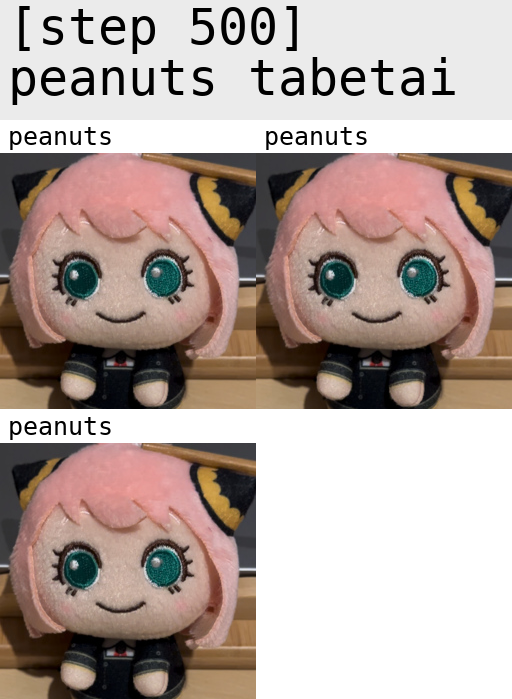

In [12]:
from PIL import Image, ImageFont
from typing import List

from grid_printer.make_captioned_grid import Typesetting, GridCaptioner, make_typesetting, make_grid_captioner

# on systems such as RHEL, you might find your fonts are installed inside /usr/share/fonts
# we ship a copy of DejaVu Sans for your convenience
deja_vu_sans_path = "font/DejaVuSansMono.ttf"
cell_font = ImageFont.truetype(deja_vu_sans_path, 25)
title_font = ImageFont.truetype(deja_vu_sans_path, 50)
# if you don't have a font handy, you can use:
# ImageFont.load_default()

pad = 8
cell_pad = mcg.BBox(top=pad, left=pad, bottom=pad, right=pad)
# abusing bottom padding to simulate a margin-bottom
title_pad = mcg.BBox(top=pad, left=pad, bottom=pad*3, right=pad)

cols=2

sample_count=3
sample: Image.Image = Image.open(f'asset/anya.jpg')
samples: List[Image.Image] = [sample]*sample_count

cell_type: Typesetting = make_typesetting(
  x_wrap_px=sample.width,
  font=cell_font,
  padding=cell_pad,
)
title_type: Typesetting = make_typesetting(
  x_wrap_px=sample.width*cols,
  font=title_font,
  padding=title_pad,
)

captioner: GridCaptioner = make_grid_captioner(
  cell_type=cell_type,
  cols=cols,
  samp_w=sample.width,
  samp_h=sample.height,
  title_type=title_type,
)

grid: Image.Image = captioner(
  imgs=samples,
  captions=['peanuts']*sample_count,
  title='[step 500] peanuts tabetai'
)

grid

In [ ]:
grid.save('peanuts-grid.jpg', subsampling=0, quality=97)